In [1]:
import os
import datautil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
if not os.path.exists("plots"):
    os.mkdir("plots")
projects = datautil.select_projects_from_libraries_io()
projects["createdTimestamp"] = pd.to_datetime(projects["createdTimestamp"])
projects["lastPushedTimestamp"] = pd.to_datetime(projects["lastPushedTimestamp"])
projects["activeMonthsCount"] = [max(1, (t2 - t1).days // 30 + 1) for t1, t2 in zip(
    projects["createdTimestamp"], projects["lastPushedTimestamp"])]

In [3]:
projects[["starsCount", "commitsCount", "activeMonthsCount", "pomFilesCount",
          "pomFileModifyingCommitsCount"]].describe()

,starsCount,commitsCount,activeMonthsCount,pomFilesCount,pomFileModifyingCommitsCount
count,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000
mean,244.002646,1220.661358,32.784958,14.588591,29.909577
std,1407.928973,5614.696277,26.970165,75.727421,178.805789
min,11.000000,1.000000,1.000000,1.000000,1.000000
25%,17.000000,37.000000,10.000000,1.000000,1.000000
50%,32.000000,142.000000,27.000000,2.000000,4.000000
75%,89.000000,554.250000,50.000000,7.000000,15.000000
max,66439.000000,225489.000000,134.000000,3254.000000,19096.000000


In [4]:
print(len(projects[projects["pomFileModifyingCommitsCount"] == 1]))
print(len(projects[projects["pomFileModifyingCommitsCount"] >= 10]))
print(len(projects[projects["pomFilesCount"] == 1]))
print(len(projects[projects["pomFilesCount"] >= 10]))
print(len(projects[projects["activeMonthsCount"] <= 3]))
print(len(projects[projects["pomFileModifyingCommitsCount"] <= 1]))
print(len(projects[projects["commitsCount"] <= 10]))

4997
6504
9561
4102
2716
4997
1774


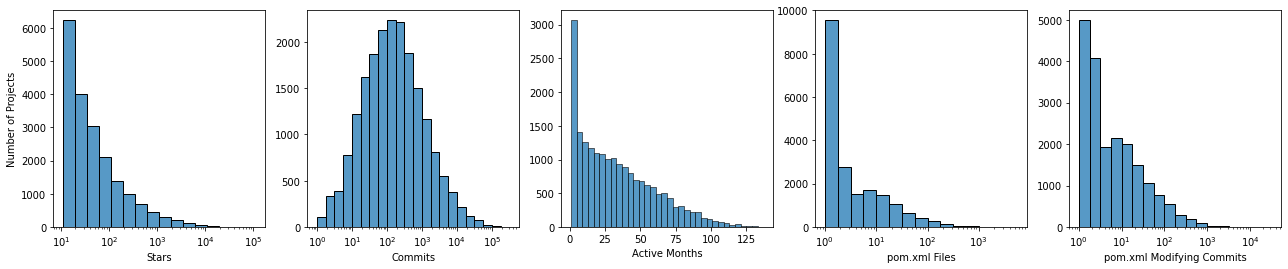

In [5]:
ylabels = ["Number of Projects", "", "", "", ""]
xlabels = ["Stars", "Commits", "Active Months", "pom.xml Files", "pom.xml Modifying Commits"]
fig, axes = plt.subplots(1, 5, figsize=(22,4))
sns.histplot(data=projects, x="starsCount", binwidth=0.25, log_scale=True, ax=axes[0])
sns.histplot(data=projects, x="commitsCount", binwidth=0.25, log_scale=True, ax=axes[1])
sns.histplot(data=projects, x="activeMonthsCount", binwidth=4, log_scale=False, ax=axes[2])
sns.histplot(data=projects, x="pomFilesCount", binwidth=0.25, log_scale=True, ax=axes[3])
sns.histplot(data=projects, x="pomFileModifyingCommitsCount", binwidth=0.25, log_scale=True, ax=axes[4])
for i in range(0, 5):
    axes[i].set_xlabel(xlabels[i])
    axes[i].set_ylabel(ylabels[i])
fig.savefig("plots/projects.pdf", bbox_inches="tight")